<a href="https://colab.research.google.com/github/neerajguleria1/driver-drowsiness-detection/blob/main/Day24.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

    Speed  Seatbelt  Drowsy  Alertness
0     129         0       1        0.5
1     250         1       1        0.8
2      55         1       1        0.3
3     130         0       0        0.6
4      56         0       0        0.7
5      88         1       1        0.7
6     320         1       0        0.1
7     249         0       0        0.3
8      55         0       0        0.4
9     124         1       1        0.6
10    129         1       0        0.2
11    122         1       0        0.4
12    180         0       0        0.4
13    186         0       1        0.8


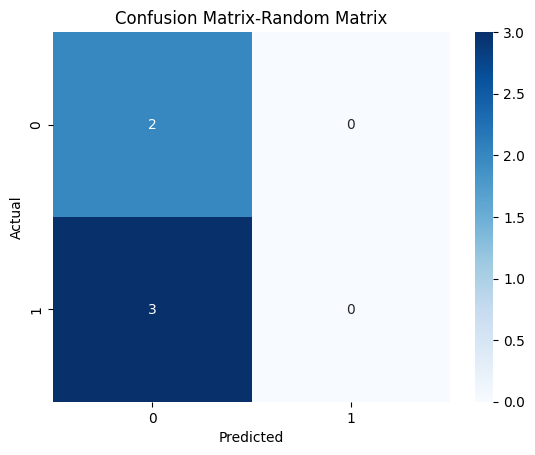

/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_

Accuracy:40.00%
Precision:0.00%
Recall:0.00%
F1 Score:0.00%

 Classification Report:
               precision    recall  f1-score   support

           0       0.40      1.00      0.57         2
           1       0.00      0.00      0.00         3

    accuracy                           0.40         5
   macro avg       0.20      0.50      0.29         5
weighted avg       0.16      0.40      0.23         5

Cross-Validation Score [0.33333333 1.         0.         0.66666667 0.5       ]
Mean Accuracy 50.0 %
Std Deviation: 33.33 %
Accuracy:40.00%
Precision:0.00%
Recall:0.00%
F1 Score:0.00%


/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


Cross-Validation Score [0.33333333 1.         0.         0.66666667 0.5       ]
Mean Accuracy 50.0 %
Std Deviation: 33.33 %


In [21]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split,cross_val_score,KFold
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report,precision_score,recall_score,f1_score


data={
    'Speed':[129,250,55,130,56,88,320,249,55,124,129,122,180,186],
    'Seatbelt':[0,1,1,0,0,1,1,0,0,1,1,1,0,0],
    'Drowsy':[1,1,1,0,0,1,0,0,0,1,0,0,0,1],
    'Alertness':[0.5,0.8,0.3,0.6,0.7,0.7,0.1,0.3,0.4,0.6,0.2,0.4,0.4,0.8]
}
df=pd.DataFrame(data)
print(df)

X=df[['Speed','Alertness','Seatbelt']]
y=df['Drowsy']
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=42)

# Now this tain model
model=RandomForestClassifier(n_estimators=100,random_state=42)
model.fit(X_train,y_train)
y_pred=model.predict(X_test)

# Step3 is Confusion Matrix

cm=confusion_matrix(y_test,y_pred)
sns.heatmap(cm,annot=True,fmt='d',cmap='Blues')
plt.title("Confusion Matrix-Random Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

#Evalution Metrics
acc=accuracy_score(y_test,y_pred)
prec=precision_score(y_test,y_pred)
rec=recall_score(y_test,y_pred)
f1=f1_score(y_test,y_pred)
print(f"Accuracy:{acc*100:.2f}%")
print(f"Precision:{prec*100:.2f}%")
print(f"Recall:{rec*100:.2f}%")
print(f"F1 Score:{f1*100:.2f}%")

# Now we print full classification report
print("\n Classification Report:\n",classification_report(y_test,y_pred))

# Now we K-Fold Cross Validation
kfold=KFold(n_splits=5,shuffle=True,random_state=42)
cv_scores=cross_val_score(model,X,y,cv=kfold,scoring='accuracy')
print("Cross-Validation Score",cv_scores)
print("Mean Accuracy",round(cv_scores.mean()*100,2),"%")
print("Std Deviation:",round(cv_scores.std()*100,2),"%")

def evaluate_model(model,X,y):
  X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=42)
  model.fit(X_train,y_train)
  y_pred=model.predict(X_test)

  acc=accuracy_score(y_test,y_pred)
  prec=precision_score(y_test,y_pred)
  rec=recall_score(y_test,y_pred)
  f1=f1_score(y_test,y_pred)
  print(f"Accuracy:{acc*100:.2f}%")
  print(f"Precision:{prec*100:.2f}%")
  print(f"Recall:{rec*100:.2f}%")
  print(f"F1 Score:{f1*100:.2f}%")

  kfold=KFold(n_splits=5,shuffle=True,random_state=42)
  cv_scores=cross_val_score(model,X,y,cv=kfold,scoring='accuracy')
  print("Cross-Validation Score",cv_scores)
  print("Mean Accuracy",round(cv_scores.mean()*100,2),"%")
  print("Std Deviation:",round(cv_scores.std()*100,2),"%")

evaluate_model(RandomForestClassifier(n_estimators=100,random_state=42),X,y)